# NLP PROJECT - SENTIMENT ANALYSIS ON MUSICAL INSTRUMENTS


# Environment settings

In [1]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\dnek\anaconda3\python.exe -m pip install --upgrade pip' command.


## Libraries

In [2]:
# Basic Imports
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from textblob import Word, TextBlob
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import string
import collections
import matplotlib.cm as cm

In [3]:
# Pandas settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Loading the data

In [4]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

#Importing dataset
df = getDF('./group/reviews_Musical_Instruments_5.json.gz')

<b>1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative. <br>
For example, look at: <br>
a. Counts, averages <br>
b. Distribution of the number of reviews across products <br>
c. Distribution of the number of reviews per product <br>
d. Distribution of reviews per user <b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10261 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 801.6+ KB


In [6]:
### check
df.shape

(10261, 9)

<b>Total columns- 9 <br> Total observations 10261<b>

In [7]:
# Top 5 rows
df.head(50)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


In [8]:
# Unique products
asin_unique = len(df["asin"].unique())
print("Number of Unique ASINs: " + str(asin_unique))

Number of Unique ASINs: 900


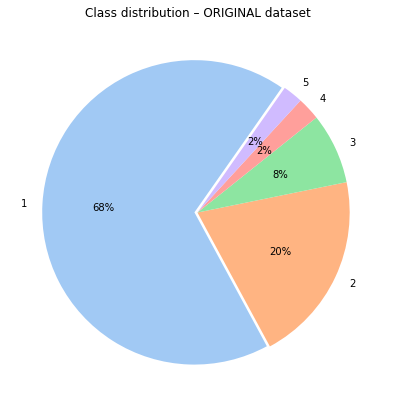

In [9]:
# Plotting class distribution
class_counts = df['overall'].value_counts()
class_labels = ['1', '2', '3', '4', '5']
colors = sns.color_palette('pastel')
explode = (0.02, 0, 0, 0, 0)  
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_labels, colors=colors, explode=explode, autopct='%.0f%%', startangle=55)
plt.title('Class distribution – ORIGINAL dataset')
plt.show()

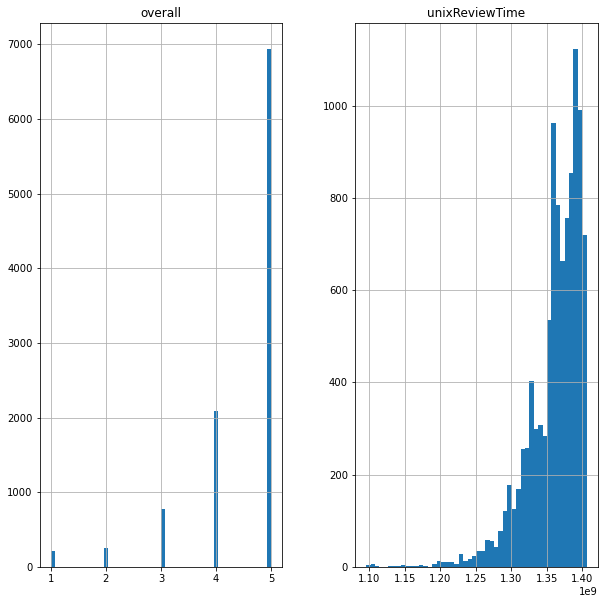

In [10]:
# Builds histogram and set the number of bins and fig size (width, height)
df.hist(bins=50, figsize=(10,10))
plt.show()

In [11]:
# Checking how many uniques ReviewerName and Asin
len(df["reviewerName"].unique()), len(df["asin"].unique())

(1398, 900)

In [12]:
# Analysis of rating given by the user
no_of_rated_products_per_user = df.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

reviewerID
ADH0O8UVJOT10     42
A1L7M2JXN4EZCR    38
A15TYOEWBQYF0X    38
A2EZWZ8MBEDOLN    36
A2NYK9KWFMJV4Y    34
Name: overall, dtype: int64

In [13]:
# Rows having duplicate value
print("Number rows having common values of [reviewerName, reviewText, unixReviewTime] =", 
      df[df.duplicated(subset=["reviewerName", "reviewText", "unixReviewTime"])].shape[0])

Number rows having common values of [reviewerName, reviewText, unixReviewTime] = 0


In [14]:
# Checking amount of null values
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

reviewerName has 27 null values. 

In [15]:
# Drop null values
df.drop_duplicates(subset ="reviewText", keep = "first", inplace = True)

In [16]:
df.describe()

,overall,unixReviewTime
count,10255.000000,1.025500e+04
mean,4.488542,1.360617e+09
std,0.894820,3.779029e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343520e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [17]:
# Total count of reviews per overall
df['overall'].value_counts()

5.0    6933
4.0    2083
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [18]:
##### Check
df.shape

(10255, 9)

In [19]:
# Overall value counts 
df['overall'].value_counts(normalize=True)

5.0    0.676060
4.0    0.203120
3.0    0.075280
2.0    0.024378
1.0    0.021160
Name: overall, dtype: float64

<b>Text basic pre-processing: <br> 
a. Randomly select 500-1000 reviews from your dataset and perform steps b 
through d.  <br> 
b. Label your data based on the value of “rating of the product” i.e. as follows:  <br> 
i. Ratings 4,5:  Positive   <br> 
ii. Rating      3:   Neutral  <br> 
iii. Ratings  1,2: Negative<b>

In [20]:
# df_Sample_full = df.copy()

In [21]:
### maybe ?
df_Sample = df.groupby('overall', group_keys=False).apply(lambda x: x.sample(200))

In [22]:
###Check
df_Sample.shape

(1000, 9)

In [23]:
# Dropping columns
col_to_drop = ['reviewerID', 
               'asin', 
               'reviewerName',
               'helpful',
               'unixReviewTime',
               'reviewTime']
df_Sample.drop(col_to_drop, axis = 1, inplace=True)

In [24]:
df_Sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 9951 to 6053
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  1000 non-null   object 
 1   overall     1000 non-null   float64
 2   summary     1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 31.2+ KB


In [25]:
df_Sample

,reviewText,overall,summary
9951,Manufacturer's website claimed that this case ...,1.0,Does NOT fit a Les Paul/ESP Eclipse shaped gui...
7335,I have an Epiphone Les Paul and this stand doe...,1.0,Does not fit my electric guitar at all
6433,This is a fantastic product that is well made....,1.0,Counter to These Negative Reviews
7165,It stopped working after 2 gigs. I'm not sure ...,1.0,Stopped working after 2 gigs
696,"I got this for my Boss Loop Station, but it do...",1.0,Got this for my Boss Loop Station.
...,...,...,...
8884,Clamp it on end of the neck of your guitar. Pl...,5.0,Awesome...
6344,This is what these things should cost and this...,5.0,"Right Price Point, Works Great"
3989,My son was very happy with this guitar strap. ...,5.0,Guitar Strap
5304,I use this to practice at my computer to keep ...,5.0,Perfect for practice


In [26]:
import numpy as np

# labeling data based on the value of rating of the product
conditions = [
    df_Sample.overall >= 4.0,
    df_Sample.overall == 3.0,
    df_Sample.overall <= 2.0,
]

values = ['Positive', 'Neutral', 'Negative']

df_Sample['Ratings'] = np.select(conditions, values)

<b>Chose the appropriate columns for your sentiment analyzer. (Give this some 
thought<b>

Combining summary with reviewText in df_Sample, df_only_reviewText keeping reviewText copy in case want to run model without summary

In [27]:
# Using + operator to combine two columns
df_Sample["reviewText"] = df_Sample['reviewText']+ df_Sample["summary"]

In [28]:
# Removing summary column
del df_Sample['summary']

In [29]:
# # Class from features separated.
# df_features = df_Sample.drop('overall', axis=1)
# df_class = df_Sample['overall']

In [30]:
df_Sample

,reviewText,overall,Ratings
9951,Manufacturer's website claimed that this case ...,1.0,Negative
7335,I have an Epiphone Les Paul and this stand doe...,1.0,Negative
6433,This is a fantastic product that is well made....,1.0,Negative
7165,It stopped working after 2 gigs. I'm not sure ...,1.0,Negative
696,"I got this for my Boss Loop Station, but it do...",1.0,Negative
...,...,...,...
8884,Clamp it on end of the neck of your guitar. Pl...,5.0,Positive
6344,This is what these things should cost and this...,5.0,Positive
3989,My son was very happy with this guitar strap. ...,5.0,Positive
5304,I use this to practice at my computer to keep ...,5.0,Positive


<b>Pre-processing<b>

In [31]:
import re
import numpy as np

def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
#Removing punctuations
import string

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
df_Sample['Pre_Processed_text'] = np.vectorize(remove_pattern)(df_Sample['reviewText'], "@[\w]*")
df_Sample['Pre_Processed_text'] = df_Sample['Pre_Processed_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df_Sample['Pre_Processed_text'] = df_Sample['Pre_Processed_text'].apply(lambda x: re.split('#(\w+)', str(x))[0])
df_Sample["Pre_Processed_text"] = df_Sample["Pre_Processed_text"].str.lower()
df_Sample['Pre_Processed_text'] = df_Sample['Pre_Processed_text'].str.replace(' \b\d+\b', " ")
df_Sample["Pre_Processed_text"] = df_Sample['Pre_Processed_text'].apply(lambda x: remove_punct(x))

Added custom list for the negation words to keep in "pre-processed text" as not_stopwords a nd removed them from the nltk stopwords library

In [32]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
# print(sw_nltk)
not_stopwords = {'not', 'no', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'don', "don't"} 
final_stop_words = set([word for word in sw_nltk if word not in not_stopwords])
print(final_stop_words)


{'where', 'are', 'that', 'have', 'very', 'will', 'again', 'did', 's', 'only', 'yours', 'until', "you'll", 'there', 'does', 'if', 'over', 'too', 'your', 'her', 'own', 'he', 'those', 'when', 'while', 'be', "that'll", 'itself', 'through', 'up', 'yourself', 'down', 'on', 'doing', 'theirs', 'both', 'm', 'himself', 'between', 'they', 'hers', 'as', 'you', "you're", 'more', "it's", 'but', 've', 'before', "she's", 'other', 'then', 'what', 'who', 'each', 'here', 'ours', 'them', 'ourselves', 'against', 'any', 'was', 'so', 'these', 'my', 'yourselves', 'or', 'why', 'some', 'herself', 't', 'during', 'about', 'above', 'in', 'to', 'because', 'were', 'all', 'we', 'y', 'been', 'our', 'his', 'had', 'few', 'its', 'how', 'below', 'd', 'it', 'into', 'now', 'me', 'whom', 'by', 'the', 'being', 'just', 'am', 'once', 'she', "you'd", 'is', 'which', 'o', 'same', 'out', 'i', 're', 'myself', 'most', 'll', 'this', 'off', 'do', 'such', 'an', 'themselves', 'for', 'than', 'with', "should've", 'a', 'after', 'him', 'furt

In [33]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

def preprocess(sentence):
    sentence=str(sentence)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in final_stop_words]
#     stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)


df_Sample['Pre_Processed_text']=df_Sample['Pre_Processed_text'].map(lambda s:preprocess(s)) 

Pre Processed data after stopwords, stemming and lemmetization

In [34]:
df_Sample['Pre_Processed_text']

9951    manufacturers website claimed case would fit l...
7335    epiphone les paul stand not hold holders far a...
6433    fantastic product well made plastic heavy duty...
7165    stopped working gigs not sure frustrating gues...
696     got boss loop station doesnt work well keep ho...
                              ...                        
8884    clamp end neck guitar pluck string indicate tu...
6344    things cost work trying chain effects single p...
3989    son happy guitar strap developing good techniq...
5304    use practice computer keep disturbing wife stu...
6053    huge gilmour fan brainer pick strings playing ...
Name: Pre_Processed_text, Length: 1000, dtype: object

In [35]:
#### check

df_Sample.shape

(1000, 4)

<b>Negative word cloud visualization<b>

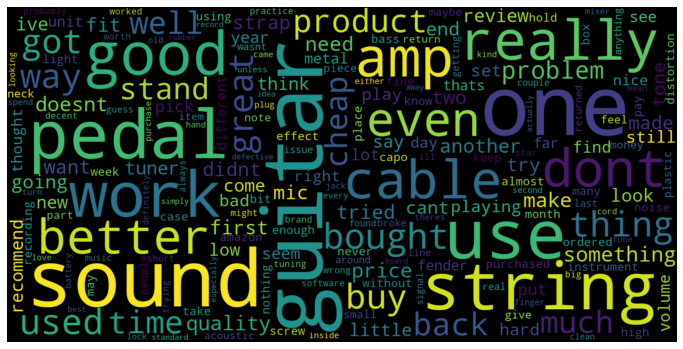

In [36]:
neg_reviews = df_Sample[df_Sample.Ratings == 'Negative']
neg_string = []
for t in neg_reviews.Pre_Processed_text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<b>Positive word cloud visualization<b>

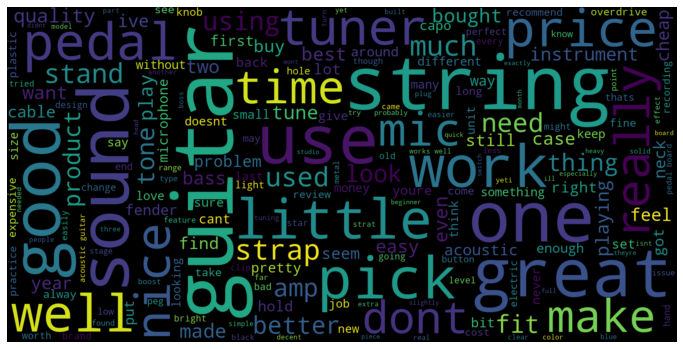

In [37]:
pos_reviews = df_Sample[df_Sample.Ratings == 'Positive']
pos_string = []
for t in pos_reviews.Pre_Processed_text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<b>Neutral word cloud visualization<b>

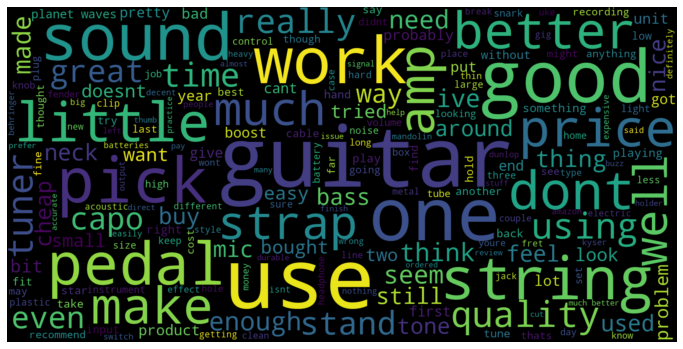

In [38]:
neu_reviews = df_Sample[df_Sample.Ratings == 'Neutral']
neu_string = []
for t in neu_reviews.Pre_Processed_text:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Stratified Sampling

Split the data into 70% for training and 30% for testing,—Use stratified splitting 
based on the rating value field.

In [39]:
y = df_Sample['overall']

In [40]:
# Applying Stratfied Shuffle
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df_Sample, y):
    strat_train_set = df_Sample.iloc[train_index]
    strat_test_set = df_Sample.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

In [41]:
print(strat_train_set.head())
print(strat_test_set.info())

                                             reviewText  overall   Ratings                                 Pre_Processed_text
7618  The strap looks great.  Very cool design and l...      3.0   Neutral  strap looks great cool design looks good tele ...
1582  Meh, these things are what they are. They didn...      3.0   Neutral  meh things didnt solve problems make anything ...
8386  This tabletop Mic Stand works. Well designed a...      4.0  Positive  tabletop mic stand works well designed made de...
9207  Used on my acoustic guitar.Pro:Removes frictio...      4.0  Positive  used acoustic guitarproremoves friction faster...
695   I got this for use with the Boss DD-20 as a ta...      5.0  Positive  got use boss taptempo job well little big defi...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 6458 to 8147
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviewText          300 non-null 

In [42]:
# Checking stratified train
strat_train_set['overall'].value_counts(normalize=True)

3.0    0.2
2.0    0.2
5.0    0.2
1.0    0.2
4.0    0.2
Name: overall, dtype: float64

In [43]:
# Checking stratified test
strat_test_set['overall'].value_counts(normalize=True)

2.0    0.2
3.0    0.2
5.0    0.2
1.0    0.2
4.0    0.2
Name: overall, dtype: float64

In [44]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 6458 to 8147
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviewText          300 non-null    object 
 1   overall             300 non-null    float64
 2   Ratings             300 non-null    object 
 3   Pre_Processed_text  300 non-null    object 
dtypes: float64(1), object(3)
memory usage: 11.7+ KB


In [45]:
#### Check
strat_test_set.shape

(300, 4)

In [46]:
print("TRAIN:\n", strat_train_set, "\nTEST:", strat_test_set)

TRAIN:
                                              reviewText  overall   Ratings                                 Pre_Processed_text
7618  The strap looks great.  Very cool design and l...      3.0   Neutral  strap looks great cool design looks good tele ...
1582  Meh, these things are what they are. They didn...      3.0   Neutral  meh things didnt solve problems make anything ...
8386  This tabletop Mic Stand works. Well designed a...      4.0  Positive  tabletop mic stand works well designed made de...
9207  Used on my acoustic guitar.Pro:Removes frictio...      4.0  Positive  used acoustic guitarproremoves friction faster...
695   I got this for use with the Boss DD-20 as a ta...      5.0  Positive  got use boss taptempo job well little big defi...
...                                                 ...      ...       ...                                                ...
8704  A great idea, but pure crap in terms of functi...      1.0  Negative  great idea pure crap terms functio

<b>Text representation: Represent your text using one of the approaches explained in 
module . Justify why you chose that approach<b>

We are using BOW and TF-IDF in machine learning approach. The Bag of Words model simply generates a set of vectors holding the count of word occurrences in the text (reviews), while the TF-IDF model includes information on both the more significant and less important words. The Bag of Words vectors are simple to understand. TF-IDF, on the other hand, frequently outperforms TF-IDF in machine learning models. Also, Only the first few words(20) were used in the Word embedding approach, whereas the TF-IDF method used all available words.<br><b>Please scroll down and check the Meachine learning approach section.<b>

### Lexicon Based Approach for Sentiment Analysis

### Textblob

In [47]:
# Applying TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

In [48]:
strat_train_df = strat_train_set.drop(strat_train_set.columns[[0,1]], axis=1) # dropping asin and overall
strat_train_df = strat_train_df[['Pre_Processed_text', 'Ratings']] # this is needed for changing columns order

In [49]:
strat_train_df

,Pre_Processed_text,Ratings
7618,strap looks great cool design looks good tele ...,Neutral
1582,meh things didnt solve problems make anything ...,Neutral
8386,tabletop mic stand works well designed made de...,Positive
9207,used acoustic guitarproremoves friction faster...,Positive
695,got use boss taptempo job well little big defi...,Positive
...,...,...
8704,great idea pure crap terms functionality dont ...,Negative
8141,different types tuners best small kids birds a...,Positive
4722,hard keep loose end holes since holes metal sc...,Neutral
2556,okay color coding great ideadivas not use red ...,Negative


In [50]:
new_val = strat_train_df.to_records(index=False)
train_data = list(new_val)
print("Convert Dataframe to list of tuples:",train_data)

Convert Dataframe to list of tuples: [('strap looks great cool design looks good tele bucks prime shipping stars fourth strap purchase planet waves grown love planet waves straps comfort durability obviously designs thought strap others different design mainly local music shops never seenfelt planet waves strap not made usual thick soft durable materialwhatever might grown love strap thin brittle feeling makes uncomfortable use strap slide easily shirt prefer makes contact neck sharp makes neck sore itchy needless say strap definitely not suited playing without shirt ouch tried running washing machine times fabric softener along using constantly try get broken still sharp package maybe years years use finally soften lasts longoverall need know strap not planet waves straps material thin brittle feeling unlike many straps planet waves comfort not important get strap price cant beat give guitar look would paid strap would furious strap still stealmy fourth worst planet waves strap', 'Neu

In [51]:
strat_test_df = strat_test_set.drop(strat_test_set.columns[[0,1]], axis=1) 

In [52]:
strat_test_df = strat_test_df[['Pre_Processed_text', 'Ratings']]

In [53]:
new_val = strat_test_df.to_records(index=False)
test_data = list(new_val)
print("Convert Dataframe to list of tuples:",test_data)

Convert Dataframe to list of tuples: [('really like footswitch seems well made price works advertised needed something change channels fender super champ xdgood product', 'Positive'), ('several mxr pedals every one superbexcept phase nonscript version reviewed phase worthless anyone wants use playing clean adds tsunami irritating distortion swoosh sonic dirt research discovered people also hate pedals distortion suggest modifications look mxr phase mods eriks corner show made modifications result slightly improved phaser one still churned plenty distortion finally tried adjusting internal trim pot setting could get rid guessed distortion spent literally hours futile frustrating effort make pedal sound merely acceptable luck bottom line want phaser doesnt add significant distortion avoid incarnation phase adds lots distortion unworthy mxr name', 'Negative'), ('title says good quality home studio use not sure would survive taken tour still price get nice adjustable stand manipulated get 

In [54]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_data)

In [55]:
# testing on stratified test data
strat_test_set['prediction'] = strat_test_set['Pre_Processed_text'].apply(lambda x: (cl.classify(x)))

In [56]:
strat_test_set

,reviewText,overall,Ratings,Pre_Processed_text,prediction
6458,I really like the foot-switch. Seems well made...,4.0,Positive,really like footswitch seems well made price w...,Positive
2534,I have several MXR pedals. Every one is superb...,1.0,Negative,several mxr pedals every one superbexcept phas...,Negative
3916,Title says it all. Good quality for home or st...,4.0,Positive,title says good quality home studio use not su...,Positive
5540,"Ok, 6 TRS patch cables, 6' long each for $30.0...",5.0,Positive,trs patch cables long skeptical purchased happ...,Negative
5555,ok when i saw the bag i was impressed nice loo...,1.0,Negative,saw bag impressed nice looking perfect style d...,Negative
9873,"I chose a 5 star rating, because i've simply n...",5.0,Positive,chose star rating ive simply never owned tuner...,Positive
6689,I tried with with my Macbook Pro with both Mou...,1.0,Negative,tried macbook pro mountain lion mavericks also...,Negative
5238,"I use two of these as L/R channels, and my Fis...",5.0,Positive,use two channels fishman soloamp center channe...,Positive
675,Very nice case for the price. Solid construct...,5.0,Positive,nice case price solid construction perfect fit...,Positive
233,well made and the perfect length for my needs....,5.0,Positive,well made perfect length needs shielding great...,Positive


In [57]:
cl.accuracy(test_data) # here it's important to give test_data NOT strat_test_set because this method only accepts list of tuples

0.56

In [58]:
# Accuracy & CLassification report & Confusion Matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(strat_test_set['Ratings'],strat_test_set['prediction']))
print('Textblob',confusion_matrix(strat_test_set['Ratings'], strat_test_set['prediction']))

              precision    recall  f1-score   support

    Negative       0.70      0.53      0.60       120
     Neutral       0.38      0.05      0.09        60
    Positive       0.51      0.84      0.63       120

    accuracy                           0.56       300
   macro avg       0.53      0.48      0.44       300
weighted avg       0.56      0.56      0.51       300

Textblob [[ 64   2  54]
 [ 12   3  45]
 [ 16   3 101]]


### Vader

In [59]:
# Importing Vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')
strat_train_df['score'] = strat_train_df['Pre_Processed_text'].apply(lambda Pre_Processed_text: sid.polarity_scores(Pre_Processed_text))
strat_train_df['compound'] =strat_train_df['score'].apply(lambda score_dict: score_dict['compound'])
strat_train_df['comp_senti'] = strat_train_df['compound'].apply(lambda c: 'Positive' if c >= 0.05 else ('Negative'if c <= -0.05 else 'Neutral'))

strat_train_df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dnek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Pre_Processed_text,Ratings,score,compound,comp_senti
7618,strap looks great cool design looks good tele ...,Neutral,"{'neg': 0.12, 'neu': 0.706, 'pos': 0.174, 'com...",0.8596,Positive
1582,meh things didnt solve problems make anything ...,Neutral,"{'neg': 0.125, 'neu': 0.562, 'pos': 0.314, 'co...",0.6560,Positive
8386,tabletop mic stand works well designed made de...,Positive,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.7579,Positive
9207,used acoustic guitarproremoves friction faster...,Positive,"{'neg': 0.014, 'neu': 0.799, 'pos': 0.187, 'co...",0.9221,Positive
695,got use boss taptempo job well little big defi...,Positive,"{'neg': 0.132, 'neu': 0.516, 'pos': 0.353, 'co...",0.4325,Positive
...,...,...,...,...,...
8704,great idea pure crap terms functionality dont ...,Negative,"{'neg': 0.19, 'neu': 0.66, 'pos': 0.15, 'compo...",-0.0772,Negative
8141,different types tuners best small kids birds a...,Positive,"{'neg': 0.075, 'neu': 0.787, 'pos': 0.138, 'co...",0.4404,Positive
4722,hard keep loose end holes since holes metal sc...,Neutral,"{'neg': 0.18, 'neu': 0.537, 'pos': 0.283, 'com...",0.4767,Positive
2556,okay color coding great ideadivas not use red ...,Negative,"{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'comp...",0.9287,Positive


In [60]:
y = strat_train_df['Ratings']

In [61]:
# Accuracy & CLassification report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Vader',classification_report(y,strat_train_df['comp_senti']))

Vader               precision    recall  f1-score   support

    Negative       0.70      0.41      0.52       280
     Neutral       0.30      0.10      0.15       140
    Positive       0.49      0.85      0.62       280

    accuracy                           0.52       700
   macro avg       0.50      0.45      0.43       700
weighted avg       0.54      0.52      0.48       700



In [62]:
# Confusion Matrix
confusion_matrix(y, strat_train_df['comp_senti'])

array([[115,  18, 147],
       [ 21,  14, 105],
       [ 28,  14, 238]], dtype=int64)

In [63]:
# Accuracy Score
accuracy_score(y, strat_train_df['comp_senti'])

0.5242857142857142

In [64]:
review='The dress I bought was the worst and extremely GOOD'
# Obtain the sid scores for your review
sid.polarity_scores(review)

{'neg': 0.273, 'neu': 0.466, 'pos': 0.261, 'compound': -0.0449}

In [65]:
##check
print(strat_train_set['Pre_Processed_text'].shape)

(700,)


<b>Machine Learning Approach<b>

In [66]:
#bow
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
bow_x_train = cv.fit_transform(strat_train_set['Pre_Processed_text'])
bow_x_test = cv.transform(strat_test_set['Pre_Processed_text'])

print('bow_x_train:',bow_x_train.shape)
print('bow_x_test:',bow_x_test.shape)

bow_x_train: (700, 61562)
bow_x_test: (300, 61562)


In [67]:
strat_train_set

,reviewText,overall,Ratings,Pre_Processed_text
7618,The strap looks great. Very cool design and l...,3.0,Neutral,strap looks great cool design looks good tele ...
1582,"Meh, these things are what they are. They didn...",3.0,Neutral,meh things didnt solve problems make anything ...
8386,This tabletop Mic Stand works. Well designed a...,4.0,Positive,tabletop mic stand works well designed made de...
9207,Used on my acoustic guitar.Pro:Removes frictio...,4.0,Positive,used acoustic guitarproremoves friction faster...
695,I got this for use with the Boss DD-20 as a ta...,5.0,Positive,got use boss taptempo job well little big defi...
...,...,...,...,...
8704,"A great idea, but pure crap in terms of functi...",1.0,Negative,great idea pure crap terms functionality dont ...
8141,I have about 4 different types of tuners and t...,5.0,Positive,different types tuners best small kids birds a...
4722,it's hard to keep the loose end under the hole...,3.0,Neutral,hard keep loose end holes since holes metal sc...
2556,"Okay, Color coding is a GREAT idea.Divas will...",1.0,Negative,okay color coding great ideadivas not use red ...


In [68]:
!pip install imblearn

You should consider upgrading via the 'c:\users\dnek\anaconda3\python.exe -m pip install --upgrade pip' command.


In [69]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(bow_x_train, y_train)

In [70]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(700, 61562)
(700,)


In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
#Naive Bayes
clf_naive_pipe = Pipeline([ 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_naive", MultinomialNB())])
clf_naive_pipe.fit(X_train_smote, y_train_smote)

import numpy as np
predicted_naive = clf_naive_pipe.predict(bow_x_test)
np.mean(predicted_naive == y_test)

0.25

In [72]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([ 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train_smote, y_train_smote)

predictedLinearSVC = clf_linearSVC_pipe.predict(bow_x_test)
np.mean(predictedLinearSVC == y_test)

0.25666666666666665

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test,predictedLinearSVC))

              precision    recall  f1-score   support

         1.0       0.24      0.25      0.25        60
         2.0       0.19      0.18      0.18        60
         3.0       0.31      0.27      0.29        60
         4.0       0.21      0.18      0.20        60
         5.0       0.32      0.40      0.36        60

    accuracy                           0.26       300
   macro avg       0.25      0.26      0.25       300
weighted avg       0.25      0.26      0.25       300



In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test,predicted_naive))

              precision    recall  f1-score   support

         1.0       0.21      0.30      0.25        60
         2.0       0.18      0.17      0.17        60
         3.0       0.31      0.27      0.29        60
         4.0       0.21      0.18      0.20        60
         5.0       0.34      0.33      0.34        60

    accuracy                           0.25       300
   macro avg       0.25      0.25      0.25       300
weighted avg       0.25      0.25      0.25       300

